In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
#from dataprep.eda import create_report
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(['Unnamed: 32', 'id'],axis = 1 ,inplace = True)

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.isnull().sum().sum()

0

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

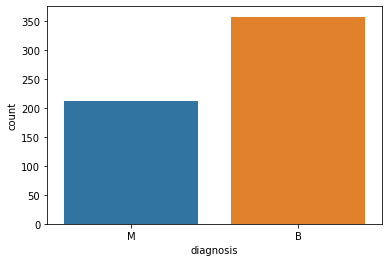

In [8]:
sns.countplot(data['diagnosis'])

In [9]:
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data.diagnosis]

<AxesSubplot:>

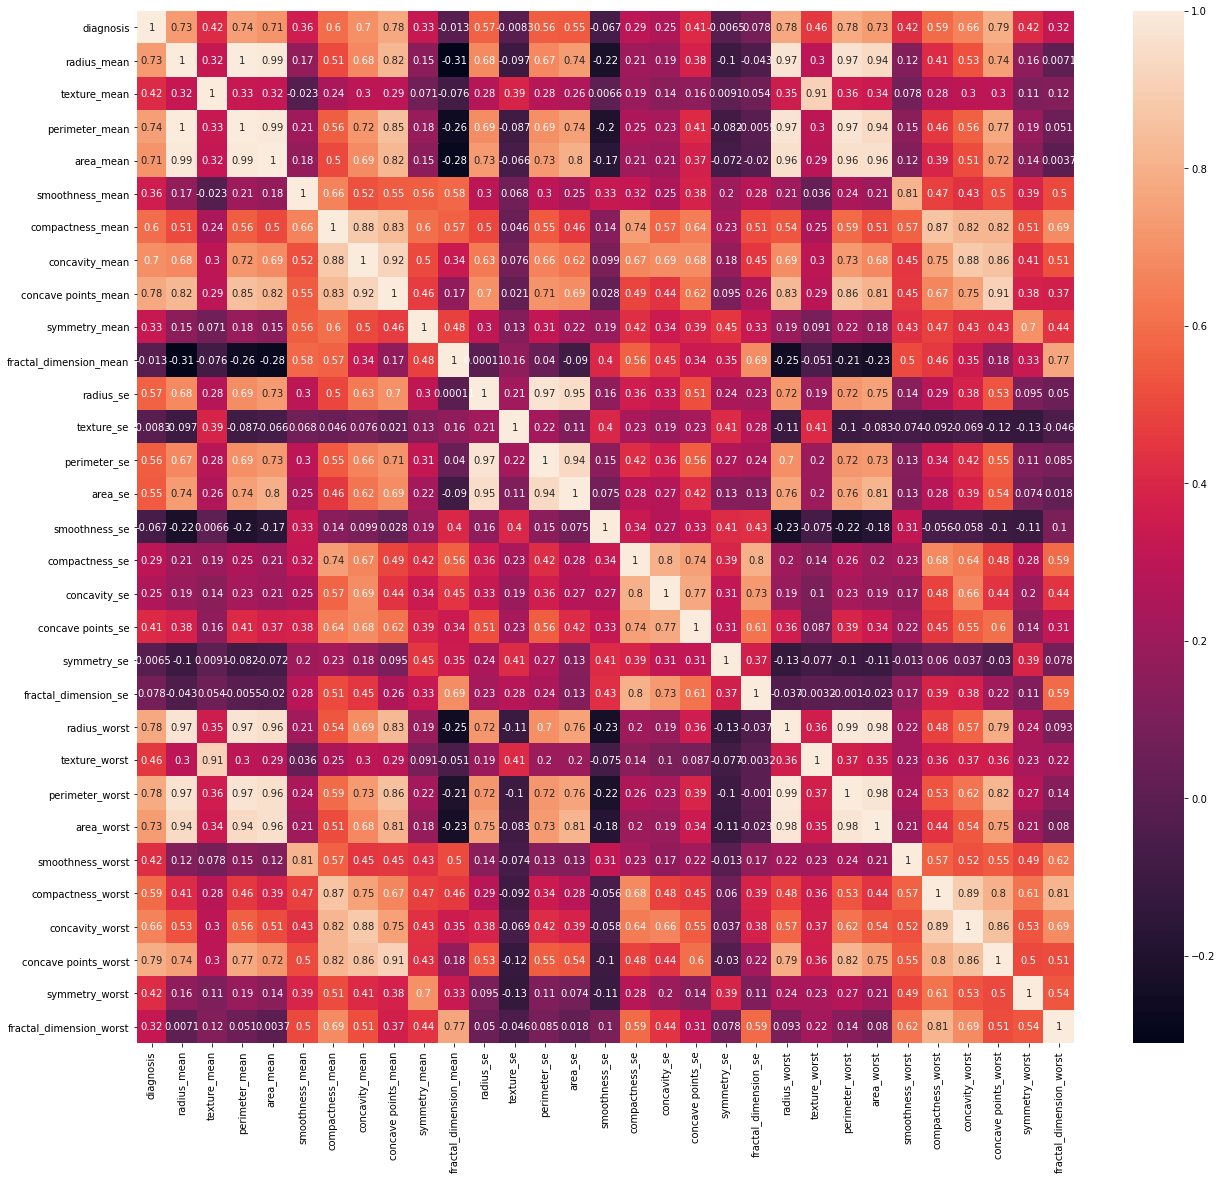

In [10]:
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(data.corr(),annot=True)

In [11]:
corr = data.corr()
print(corr["diagnosis"].sort_values(ascending=False))

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<AxesSubplot:title={'center':'Correlation with target'}>

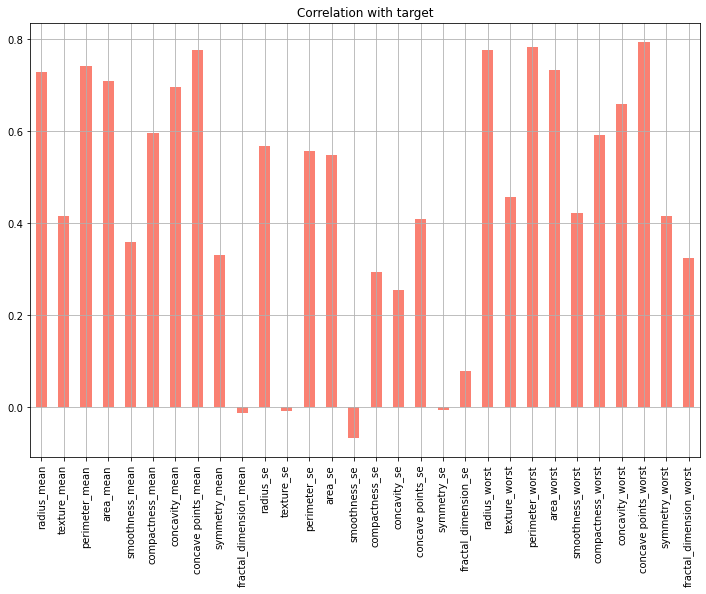

In [12]:
#Correlation with Target Variable
data.drop('diagnosis', axis=1).corrwith(data['diagnosis']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color="salmon")


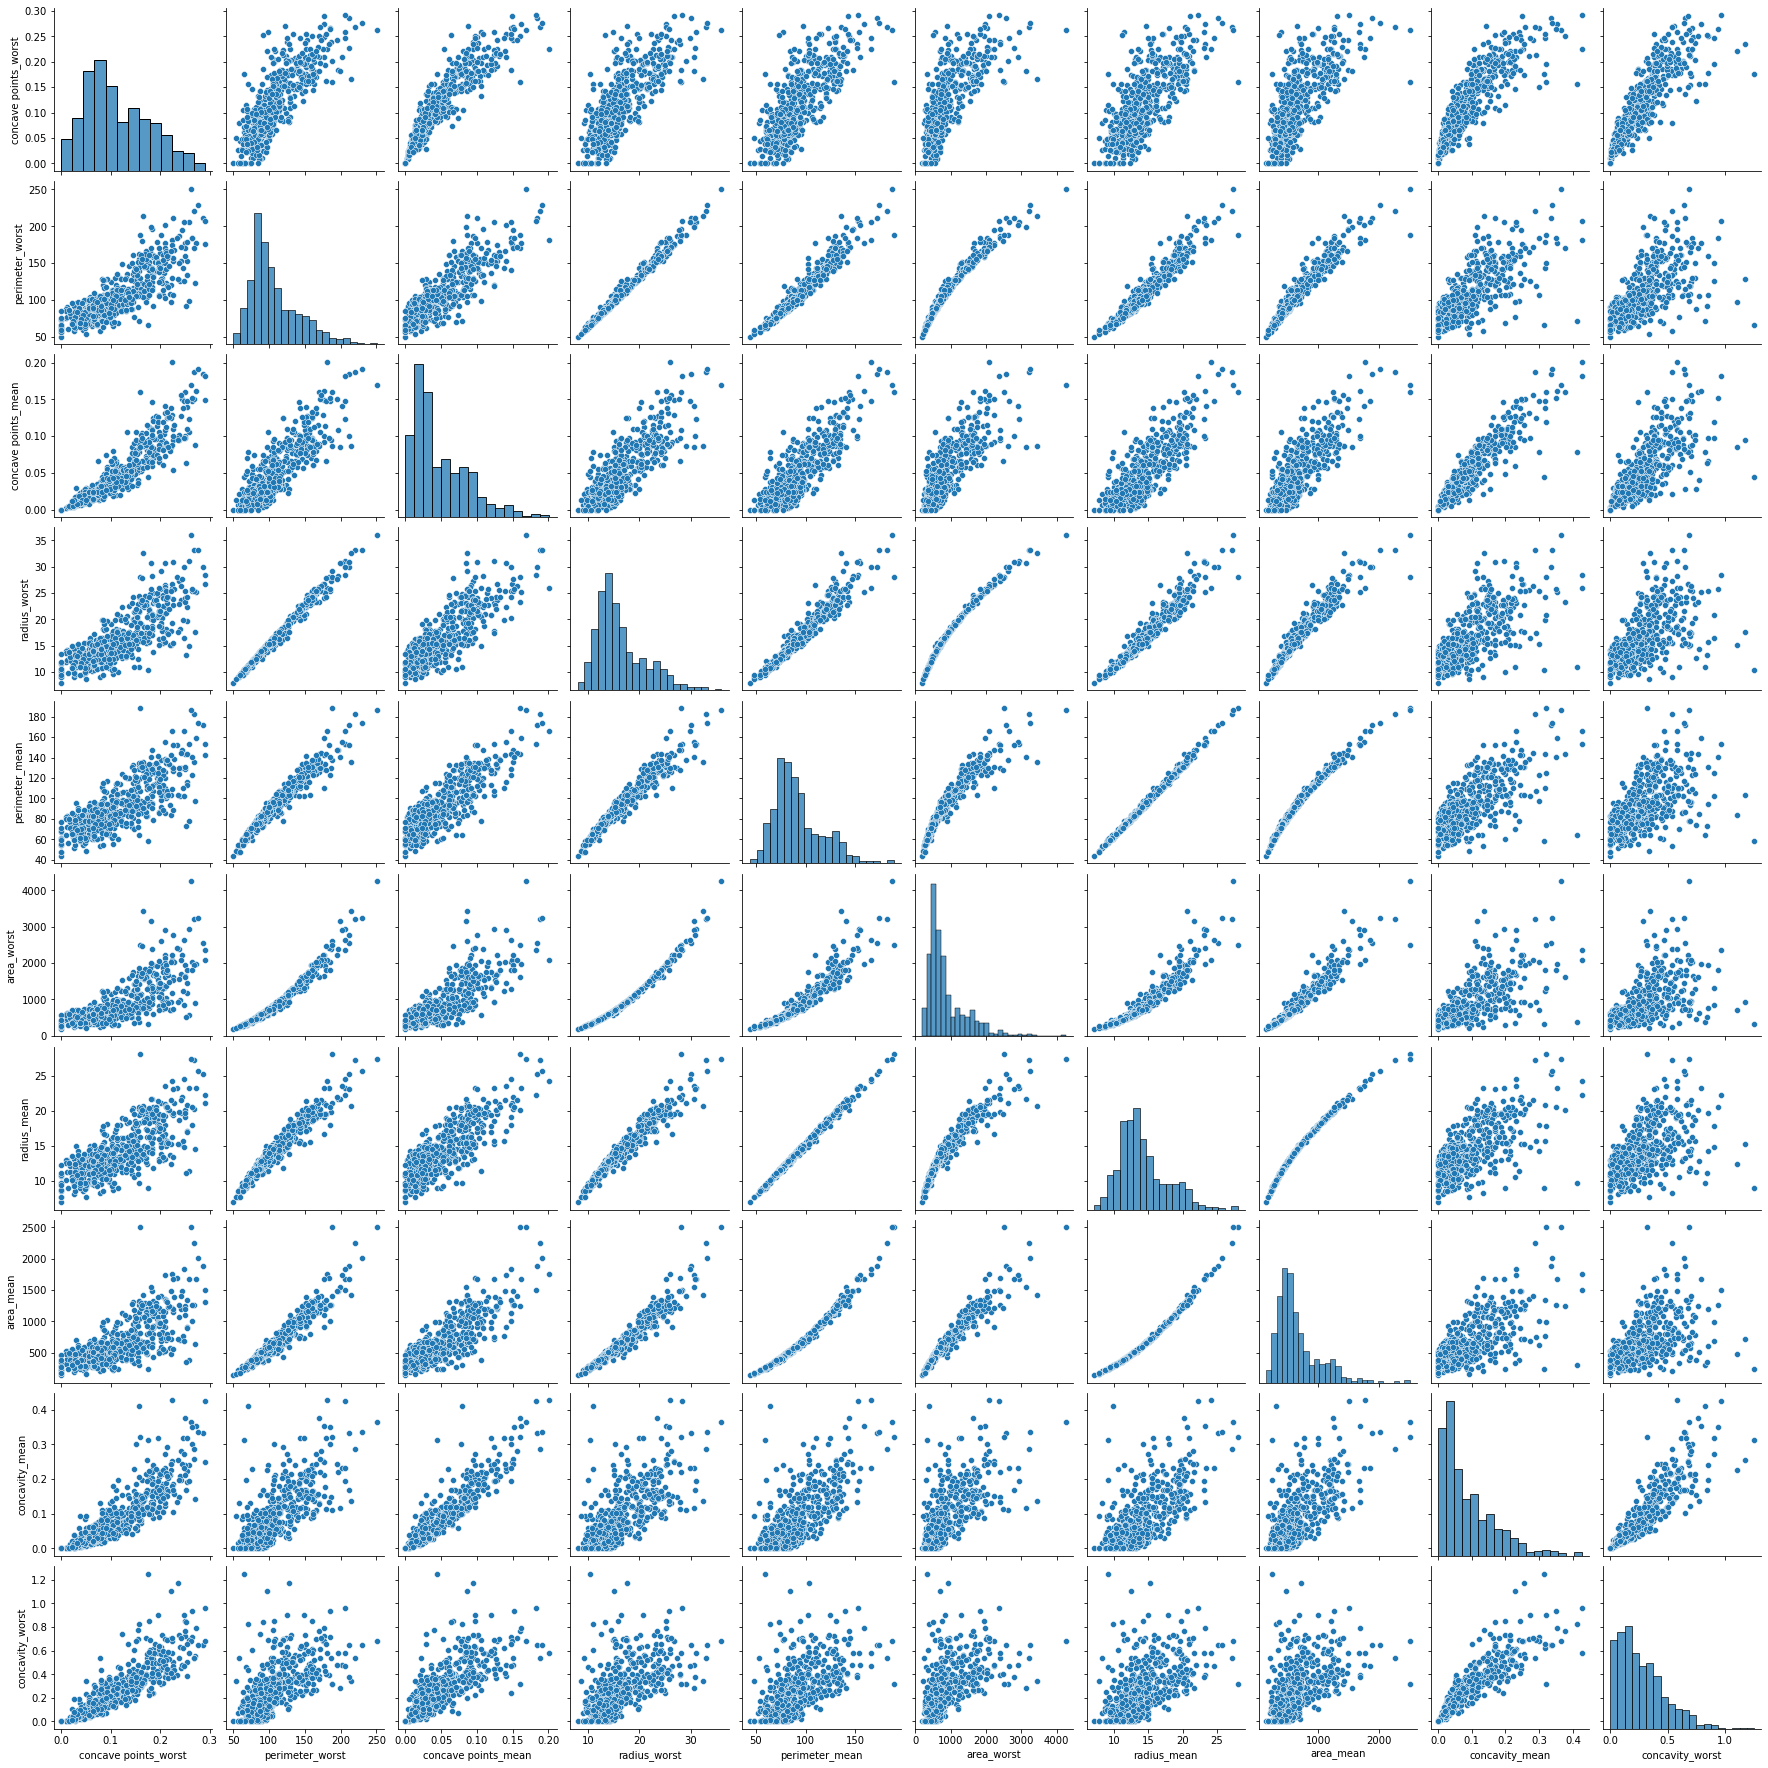

In [13]:
#Exploring the primary features.
sns.pairplot(data[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst']])

In [14]:
Selected_df=data[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst']]

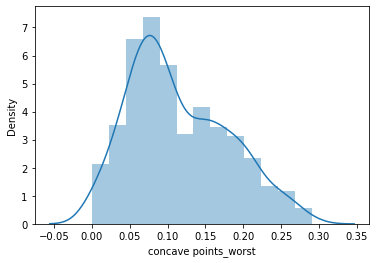

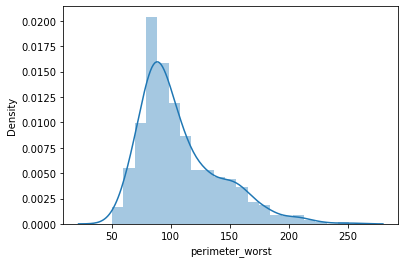

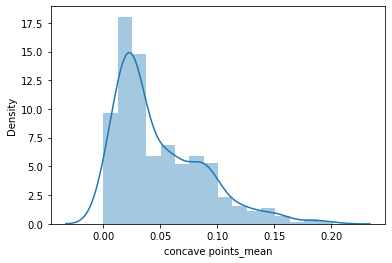

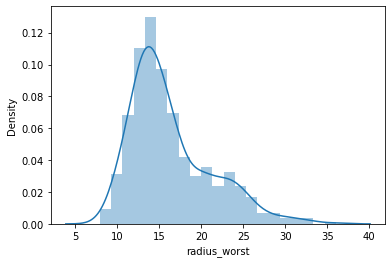

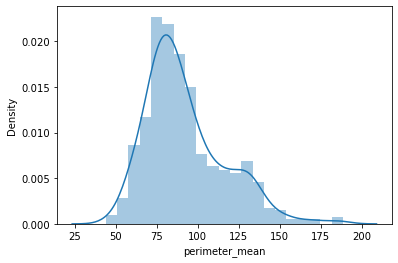

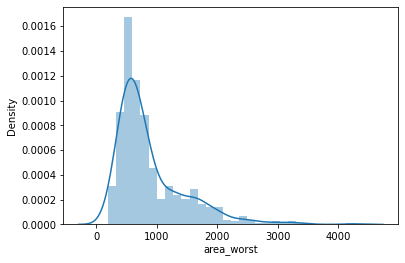

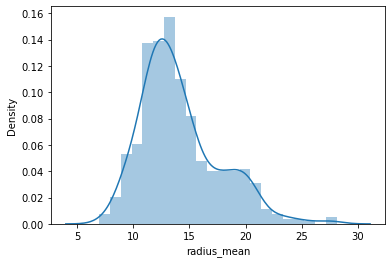

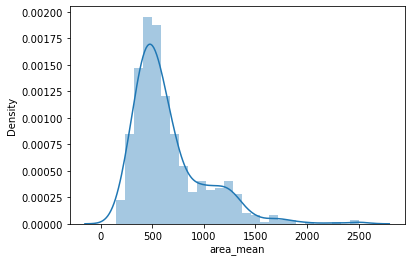

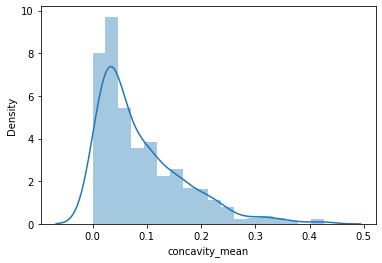

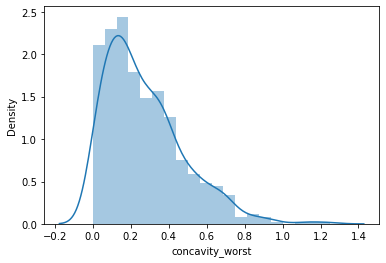

In [15]:
list_columns=list(Selected_df.columns)
for i in list_columns:
    sns.distplot(Selected_df[i],label=i,kde=True)
    plt.show()

In [16]:
# df = data.drop(['diagnosis'], axis = 1)
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(df)
# pca = PCA(n_components = 0.95)
# x = pca.fit_transform(scaled_df)
# x = pca.fit_transform(scaled_df)

In [17]:
# pca = PCA().fit(scaled_df)
# plt.rcParams["figure.figsize"] = (12,6)
# fig, ax = plt.subplots()
# xi = np.arange(1,31, step = 1)
# y = np.cumsum(pca.explained_variance_ratio_)
# plt.ylim(0.0,1.1)
# plt.plot(xi,y,marker='o',linestyle='--',color='b')
# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0,31,step =1))
# plt.ylabel('Cumulative variance(%)')
# plt.title('the number of components needed')
# plt.axhline(y=0.95,color='r',linestyle='-')
# plt.text(0.5,0.85,'95% cutoff',color = 'red',fontsize=16)
# ax.grid(axis='x')
# plt.show()

In [18]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# # find best scored k features
# select_feature = SelectKBest(chi2, k=10).fit(data.drop('diagnosis',axis = 1 ), data['diagnosis'])

# print('Score list:', select_feature.scores_)
# print('Feature list:', data.columns)
# select_feature

In [19]:
# select_feature.transform(data.drop('diagnosis',axis = 1))
# selected_columns = np.array(data.drop('diagnosis',axis = 1).columns)[select_feature.get_support()]
# selected_columns
# Selected_df = pd.DataFrame(select_feature.transform(data.drop('diagnosis',axis = 1)),columns=selected_columns)

In [20]:
y = data.diagnosis

In [21]:
#Removing the skewness
def log_transform(col):
    return np.log1p(col[0])
list_columns= list(Selected_df.columns)
li=list_columns
print(li)
for i in li:
    Selected_df[i]=Selected_df[[i]].apply(log_transform, axis=1)

['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(Selected_df, y, test_size=0.2, random_state=42)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Classsification Report (Validation set):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.92      0.92      0.92        36

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

Classsification Report (Test set):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

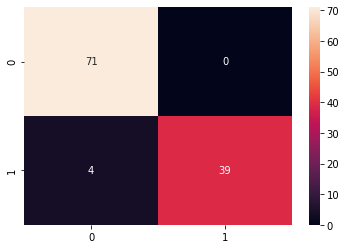

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred_v= clf.predict(X_v)
print(f"Classsification Report (Validation set):\n{classification_report(y_v,y_pred_v)}")

y_pred = clf.predict(X_test)
print(f"Classsification Report (Test set):\n{classification_report(y_test,y_pred)}")


confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report(Validation set):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.89      0.94      0.92        36

    accuracy                           0.93        91
   macro avg       0.93      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91

Classsification Report(Test set):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

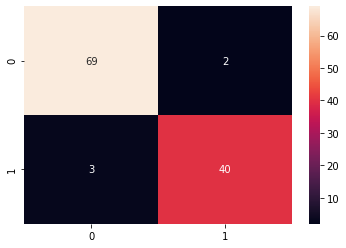

In [24]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rf_v= rfc.predict(X_v)
print(f"Classsification Report(Validation set):\n{classification_report(y_v,y_pred_rf_v)}")

y_pred_rf=rfc.predict(X_test)
print(f"Classsification Report(Test set):\n{classification_report(y_test,y_pred_rf)}")


confmat = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report(Validation set):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.87      0.94      0.91        36

    accuracy                           0.92        91
   macro avg       0.92      0.93      0.92        91
weighted avg       0.93      0.92      0.92        91

Classsification Report(Test set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<AxesSubplot:>

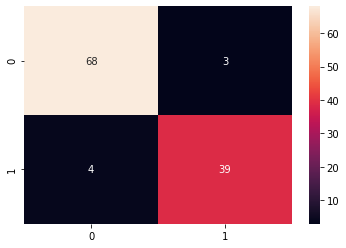

In [25]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_dt_v= tree.predict(X_v)
print(f"Classsification Report(Validation set):\n{classification_report(y_v,y_pred_dt_v)}")

y_pred_dt=tree.predict(X_test)
print(f"Classsification Report(Test set):\n{classification_report(y_test,y_pred_dt)}")


confmat = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report(Validation set):
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.97      0.89      0.93        36

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91

Classsification Report(Test set):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

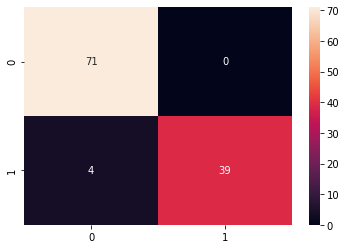

In [26]:
knn= KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
y_pred_knn_v= knn.predict(X_v)
print(f"Classsification Report(Validation set):\n{classification_report(y_v,y_pred_knn_v)}")

y_pred_knn= knn.predict(X_test)
print(f"Classsification Report(Test set):\n{classification_report(y_test,y_pred_knn)}")


confmat = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(confmat,annot=True,fmt="d")


Classsification Report(Validation set):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.89      0.94      0.92        36

    accuracy                           0.93        91
   macro avg       0.93      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91

Classsification Report(Test set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

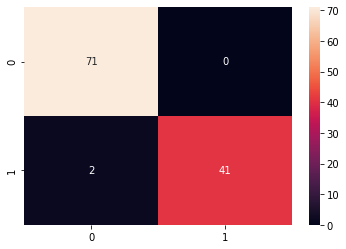

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0).fit(X_train,y_train)
y_pred_svc_v= svc.predict(X_v)
print(f"Classsification Report(Validation set):\n{classification_report(y_v,y_pred_svc_v)}")

y_pred_svc= svc.predict(X_test)
print(f"Classsification Report(Test set):\n{classification_report(y_test,y_pred_svc)}")



confmat = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report(Validation set):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.89      0.89      0.89        36

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91

Classsification Report(Test set):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



<AxesSubplot:>

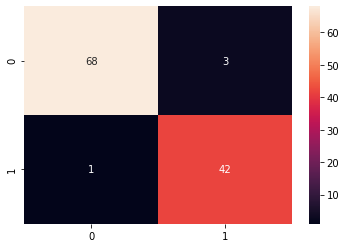

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train,y_train)
y_pred_gnb_v= gnb.predict(X_v)
print(f"Classsification Report(Validation set):\n{classification_report(y_v,y_pred_gnb_v)}")

y_pred_gnb = gnb.predict(X_test)
print(f"Classsification Report(Test set):\n{classification_report(y_test,y_pred_gnb)}")


confmat = confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(confmat,annot=True,fmt="d")